## Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#import this

In [2]:
# import clean db
morra = pd.read_csv('morra.csv') 

Compare the mean of the click_time across tempo1/tempo2

In [3]:
for col in  morra.filter(like='_First_Click').columns:
    morra[col] = pd.to_numeric(morra[col], errors='coerce')
#morra.dtypes

first_click_t1 = morra.filter(like='_First_Click_t1')
first_click_t2 = morra.filter(like='_First_Click_t2')

print ('Mean first_click tempo1', first_click_t1.mean(axis=1).mean())
print ('Mean first_click tempo2', first_click_t2.mean(axis=1).mean())

Mean first_click tempo1 4.606669072164949
Mean first_click tempo2 2.4243144329896906


----> **Ipotesi non confermata: ci mettono di più a rispondere al gioco della morra nel tempo1 perchè stanno imparando a giocare, non ci mettono più al tempo2 perchè ragionano di più sulla strategia** <----

Repeat the test diving in ict and psycho

In [4]:
first_click_t1 = morra.loc[morra['course']== 'ict'].filter(like='_First_Click_t1')
first_click_t2 = morra.loc[morra['course']== 'ict'].filter(like='_First_Click_t2')

print ('Mean first_click tempo1 ict', first_click_t1.mean(axis=1).mean())
print ('Mean first_click tempo2 ict', first_click_t2.mean(axis=1).mean())

first_click_t1 = morra.loc[morra['course']== 'psycho'].filter(like='_First_Click_t1')
first_click_t2 = morra.loc[morra['course']== 'psycho'].filter(like='_First_Click_t2')

print ('Mean first_click tempo1 psycho', first_click_t1.mean(axis=1).mean())
print ('Mean first_click tempo2 psycho', first_click_t2.mean(axis=1).mean())

Mean first_click tempo1 ict 4.887536231884057
Mean first_click tempo2 ict 2.7532072463768116
Mean first_click tempo1 psycho 3.9145321428571433
Mean first_click tempo2 psycho 1.6138285714285716


Linear regression

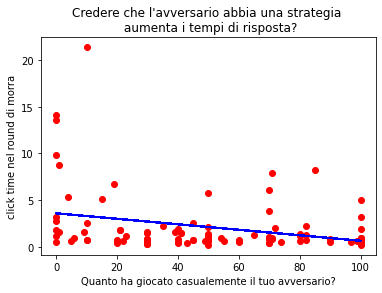

In [5]:
morra['morraRandom_t2'] = pd.to_numeric(morra['morraRandom_t2'], errors='coerce')

y = morra['morra10_First_Click_t2'].values
x = morra['morraRandom_t2'].values.reshape(-1, 1)



regressor = LinearRegression()
regressor.fit(x,y)

plt.scatter(x, y, color='red') # plotting the observation line
plt.plot(x, regressor.predict(x), color='blue') # plotting the regression line 
    
plt.title("Credere che l'avversario abbia una strategia \n aumenta i tempi di risposta?") 
plt.ylabel("click time nel round di morra") 
plt.xlabel("Quanto ha giocato casualemente il tuo avversario?")

plt.show() 

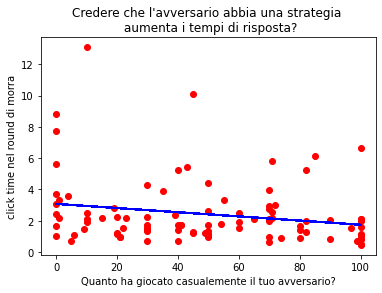

In [6]:
morra['morraRandom_t2'] = pd.to_numeric(morra['morraRandom_t2'], errors='coerce')

y = morra.filter(like='_First_Click_t2').mean(axis=1)
x = morra['morraRandom_t2'].values.reshape(-1, 1)



regressor = LinearRegression()
regressor.fit(x,y)

plt.scatter(x, y, color='red') # plotting the observation line
plt.plot(x, regressor.predict(x), color='blue') # plotting the regression line 
    
plt.title("Credere che l'avversario abbia una strategia \n aumenta i tempi di risposta?") 
plt.ylabel("click time nel round di morra") 
plt.xlabel("Quanto ha giocato casualemente il tuo avversario?")

plt.show() 